# タイタニック号

https://ja.wikipedia.org/wiki/%E3%82%BF%E3%82%A4%E3%82%BF%E3%83%8B%E3%83%83%E3%82%AF_(%E5%AE%A2%E8%88%B9)

https://ja.wikipedia.org/wiki/%E3%82%BF%E3%82%A4%E3%82%BF%E3%83%8B%E3%83%83%E3%82%AF%E5%8F%B7%E6%B2%88%E6%B2%A1%E4%BA%8B%E6%95%85

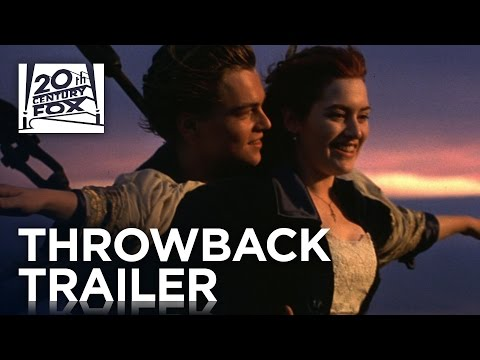

In [1]:
import IPython.display
IPython.display.YouTubeVideo('CHekzSiZjrY', width=960, height=540)

| 変数名　|	Definition |	Key|
|:-|:-|:-|
survival	| 生存状況 |	0 = No, 1 = Yes
pclass　|	チケットクラス |	1 = 一等, 2 = 二等, 3 = 3等
sex	| 性別
Age	| 年齢
sibsp|	同乗した兄弟や配偶者の数
parch|	同乗した親や子の数
ticket|	チッケット番号	|
fare	| 旅客運賃	|
cabin	| 船室番号	|
embarked	|　乗船港	|C = Cherbourg (仏・シェルブール), Q = Queenstown, S = Southampton


## 乗船港

In [140]:
import folium

Cherbourg = [49.63, -1.62]
Queenstown = [51.851, -8.2967]
Southampton = [50.89696, -1.40416]
center = [(x+y+z)/3 for (x, y, z) in zip(Cherbourg, Queenstown, Southampton)]
# center =[45, 5]

m = folium.Map(location=center, tiles='Stamen Terrain', zoom_start=6) 
folium.Marker(location=Cherbourg, popup='<b>Cherbourg</b>').add_to(m)
folium.Marker(location=Queenstown, popup='<b>Queenstown</b>').add_to(m)
folium.Marker(location=Southampton, popup='<b> Southampton</b>').add_to(m)

m

## Init

In [5]:
import numpy as np
import pandas as pd
# pd.set_option('display.max_rows')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', font_scale = 1.8)
plt.rcParams['figure.dpi'] = 300
%matplotlib inline

## Load

In [6]:
df = pd.read_csv("./data/train.csv")

In [43]:
titanic = sns.load_dataset("titanic")

## データの様子

In [7]:
df.head().style.set_properties(**{'text-align': 'left'}).set_table_styles([ dict(selector='th', props=[('text-align', 'left')] ) ])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,nan,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,nan,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,nan,S


In [29]:
# 敬称を抽出する関数
def Title(name):
    ret = 'Other'
    target = name.split(" ")
    for i in range(len(target)):
        if "." in target[i]:
            ret = target[i]
            break
    return ret

In [30]:
df['Title'] = df['Name'].apply(Title)

In [26]:
df['Title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess.', 'Jonkheer.'], dtype=object)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [32]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,17
top,NaN,NaN,NaN,"Kenyon, Mrs. Frederick R (Marion)",male,NaN,NaN,NaN,347082,NaN,B96 B98,S,Mr.
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644,517
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,NaN


In [33]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [34]:
df[['Survived', 'Pclass']] = df[['Survived', 'Pclass']].astype(str)

## 欠損値

In [35]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

In [36]:
df[df.isna().sum(axis=1)>0].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
5,0,3,male,NaN,0,0,8.4583,Q,Mr.
17,1,2,male,NaN,0,0,13.0000,S,Mr.
19,1,3,female,NaN,0,0,7.2250,C,Mrs.
26,0,3,male,NaN,0,0,7.2250,C,Mr.
28,1,3,female,NaN,0,0,7.8792,Q,Miss.


In [37]:
df.dropna(subset=['Embarked'], inplace=True)

# 単変量分析

In [38]:
print(df.columns.values)

['Survived' 'Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked' 'Title']


In [39]:
cat = ['Survived', 'Pclass', 'Sex', 'Embarked', 'Title']
num = ['Age', 'SibSp', 'Parch', 'Fare']
print('NOE: cat=', len(cat))
print('NOE: num=', len(num))

NOE: cat= 5
NOE: num= 4


## 質的変数

In [40]:
df[cat].describe()

,Survived,Pclass,Sex,Embarked,Title
count,889,889,889,889,889
unique,2,3,2,3,17
top,0,3,male,S,Mr.
freq,549,491,577,644,517


## 量的変数

In [41]:
round(df[num].describe())

,Age,SibSp,Parch,Fare
count,712.0,889.0,889.0,889.0
mean,30.0,1.0,0.0,32.0
std,14.0,1.0,1.0,50.0
min,0.0,0.0,0.0,0.0
25%,20.0,0.0,0.0,8.0
50%,28.0,0.0,0.0,14.0
75%,38.0,1.0,0.0,31.0
max,80.0,8.0,6.0,512.0


## 質的変数の棒グラフ

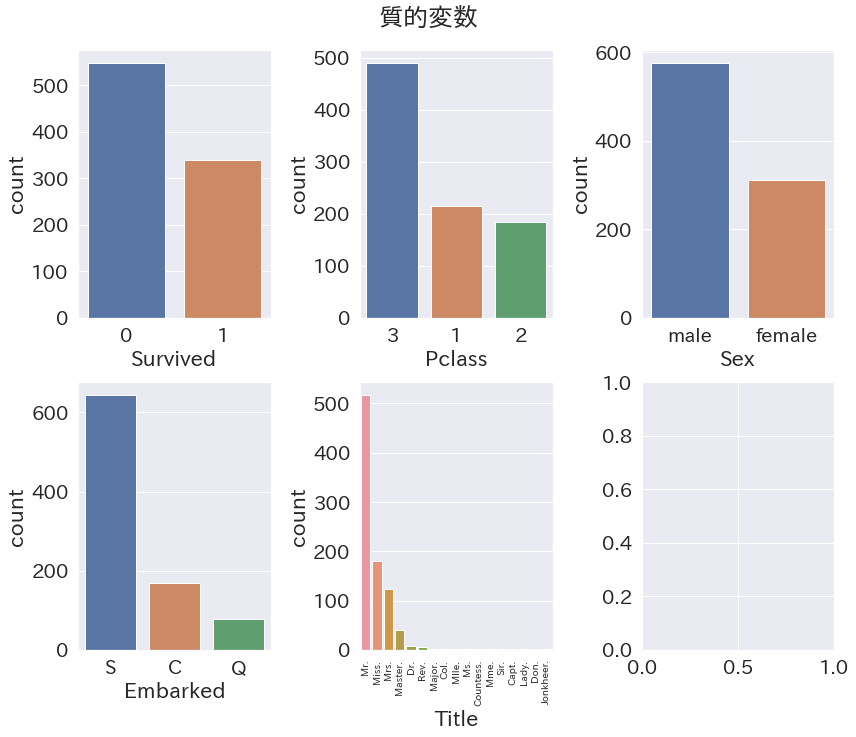

In [60]:
nor, noc = 2, 3
fig, axs = plt.subplots(nor, noc, figsize=(12, 10))
for i in range(nor):
    for j in range(noc):
        k = noc*i + j
        if k < len(cat):
            sns.countplot(x=cat[k], data=df, order=df[cat[k]].value_counts().index, ax=axs[i, j])
fig.tight_layout()
fig.suptitle('質的変数', fontsize=25)
fig.subplots_adjust(top=0.92)
labels = axs[1,1].get_xticklabels()
#plt.setp(labels, rotation=90);
axs[1,1].set_xticklabels(labels, rotation='vertical', fontsize=10)
plt.show()

## 量的変数のヒストグラム

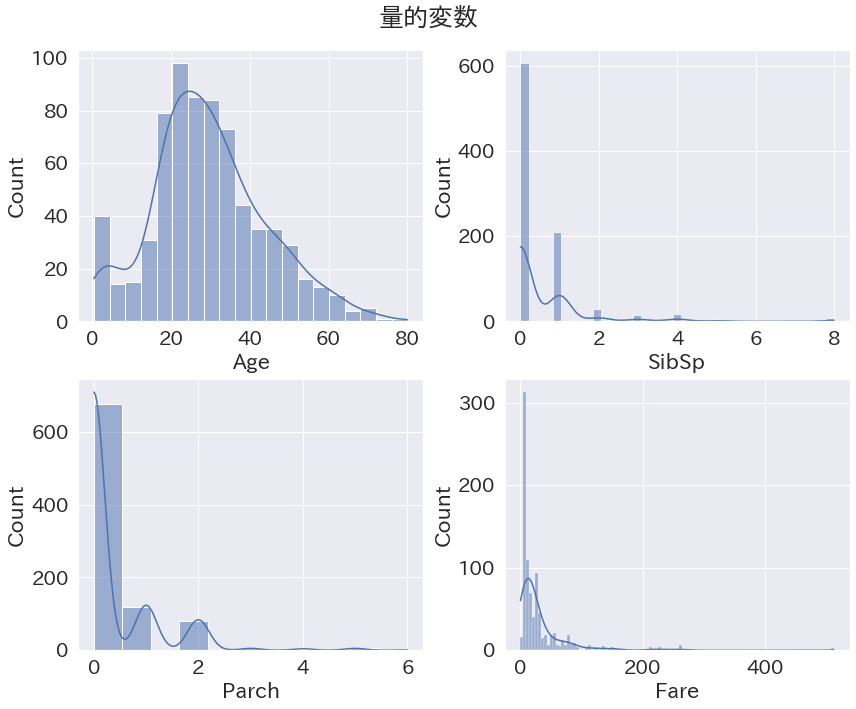

In [61]:
nor, noc = 2, 2
fig, axs = plt.subplots(nor, noc, figsize=(12, 10))
for i in range(nor):
    for j in range(noc):
        k = noc*i + j
        if k < len(num):
            sns.histplot(x=num[k], kde=True, data=df, ax=axs[i, j])
fig.tight_layout()
fig.suptitle('量的変数', fontsize=25)
fig.subplots_adjust(top=0.92)
plt.show()

# 多変量分析

## 質的変数：の積み上げ棒グラフ

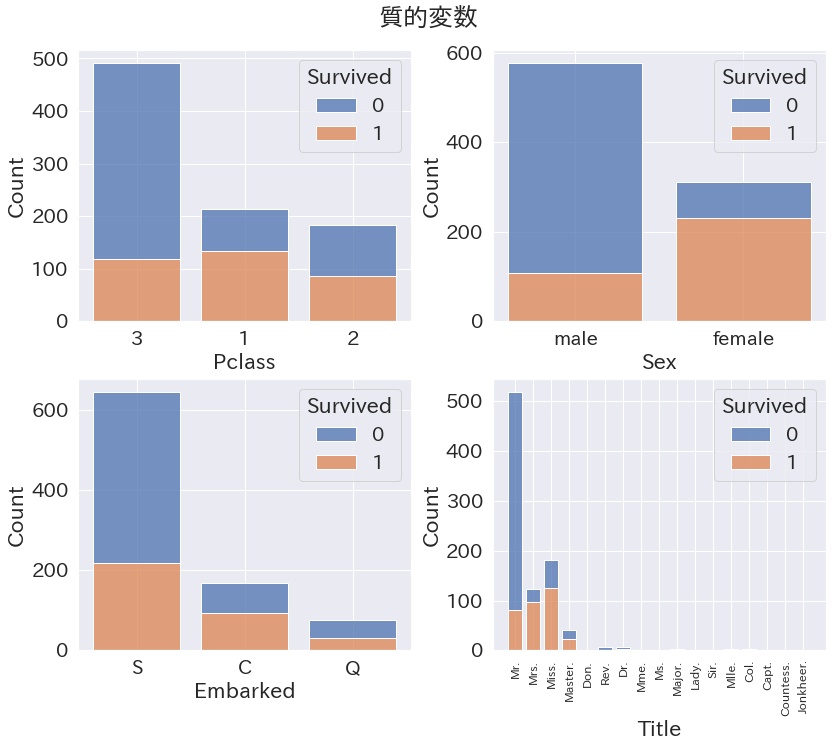

In [118]:
nor, noc = 2, 2
fig, axs = plt.subplots(nor, noc, figsize=(12, 10))
for i in range(nor):
    for j in range(noc):
        k = noc*i + j
        sns.histplot(data=df, x=['Pclass', 'Sex', 'Embarked', 'Title'][k], hue='Survived', multiple='stack', shrink=.8, ax=axs[i, j])
fig.tight_layout()
fig.suptitle('質的変数', fontsize=25)
fig.subplots_adjust(top=0.92)
labels = axs[1,1].get_xticklabels()
plt.setp(labels, rotation=90, fontsize=12)
plt.show()

## 量的変数：100％積み上げ棒グラフ

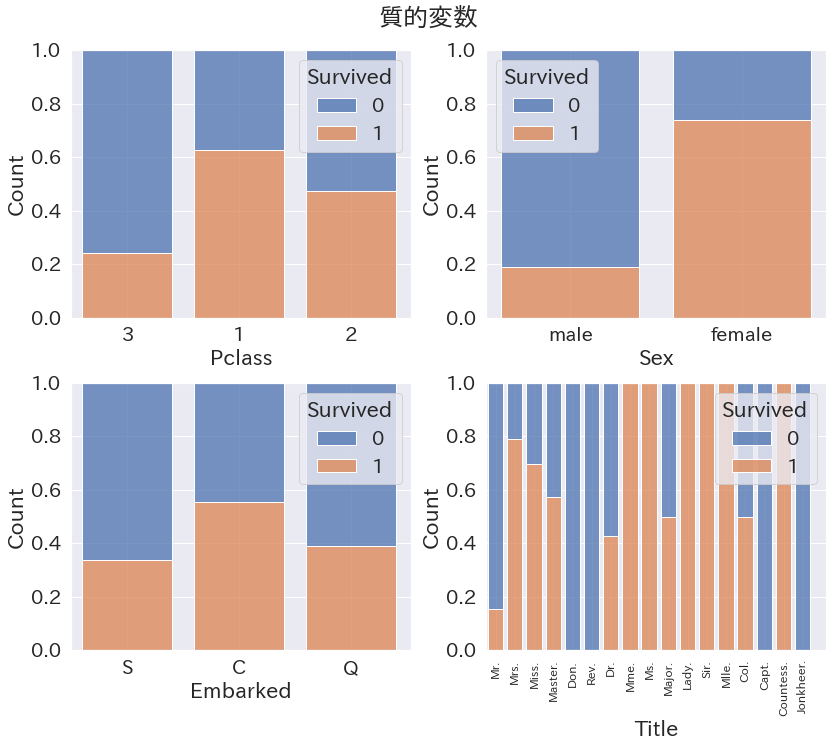

In [119]:
nor, noc = 2, 2
fig, axs = plt.subplots(nor, noc, figsize=(12, 10))
for i in range(nor):
    for j in range(noc):
        k = noc*i + j
        sns.histplot(data=df, x=['Pclass', 'Sex', 'Embarked', 'Title'][k], hue='Survived', multiple='fill', shrink=.8, ax=axs[i, j])
fig.tight_layout()
fig.suptitle('質的変数', fontsize=25)
fig.subplots_adjust(top=0.92)
labels = axs[1,1].get_xticklabels()
plt.setp(labels, rotation=90, fontsize=12)
plt.show()

## 量的変数：ヒストグラム

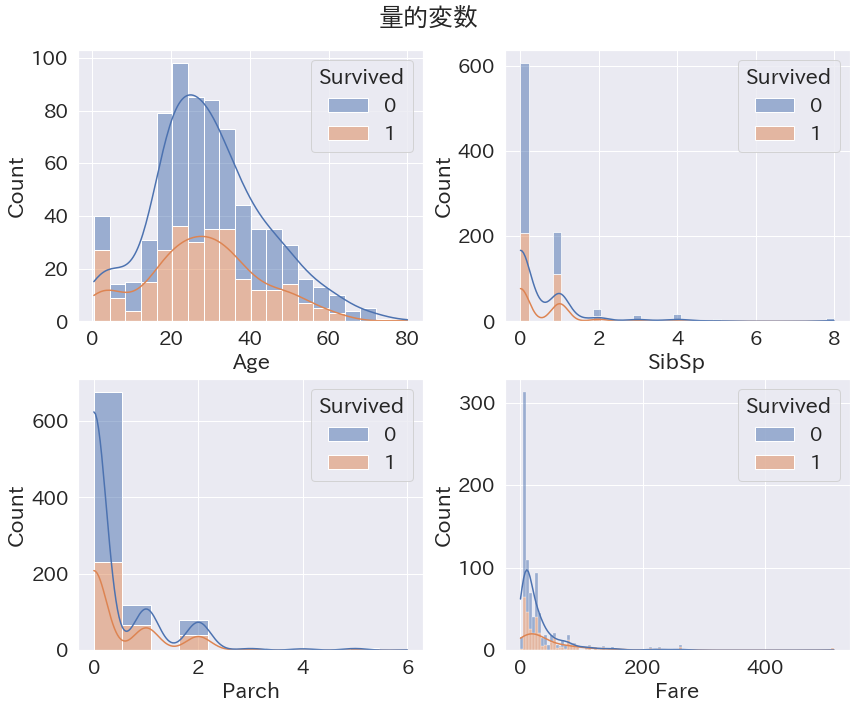

In [98]:
nor, noc = 2, 2
fig, axs = plt.subplots(nor, noc, figsize=(12, 10))
for i in range(nor):
    for j in range(noc):
        k = noc*i + j
        if k < len(num):
            sns.histplot(x=num[k], hue='Survived', multiple='stack', kde=True, data=df, ax=axs[i, j])
fig.tight_layout()
fig.suptitle('量的変数', fontsize=25)
fig.subplots_adjust(top=0.92)
plt.show()

## 量的変数：100％積み上げ棒グラフ

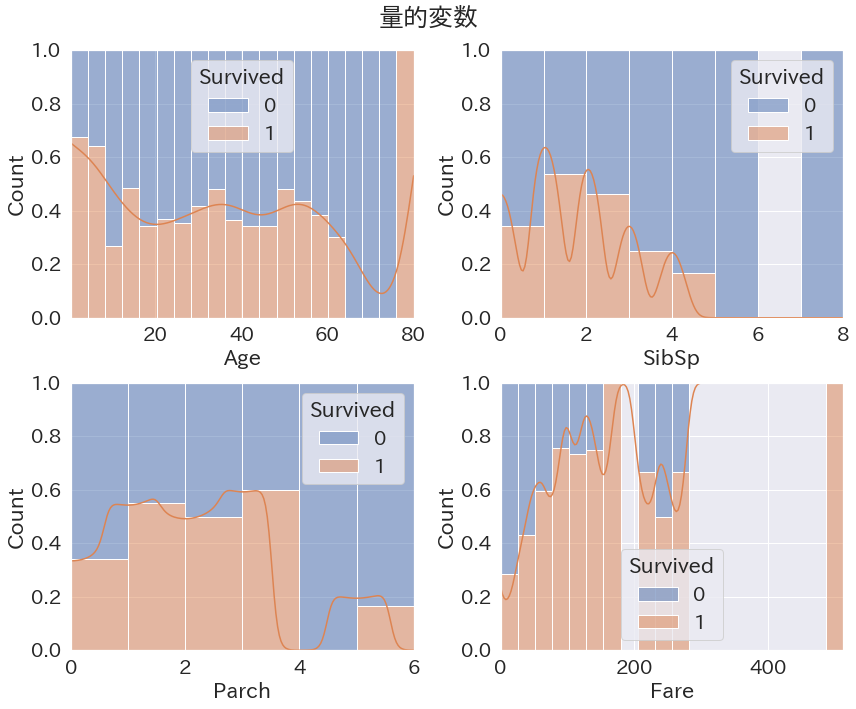

In [151]:
nor, noc = 2, 2
fig, axs = plt.subplots(nor, noc, figsize=(12, 10))
for i in range(nor):
    for j in range(noc):
        k = noc*i + j
        if k < len(num):
            sns.histplot(x=num[k], hue='Survived', multiple='fill', bins=[20,8,6,20][k], kde=True, data=df, ax=axs[i, j])
fig.tight_layout()
fig.suptitle('量的変数', fontsize=25)
fig.subplots_adjust(top=0.92)
plt.show()

## 箱ヒゲ図

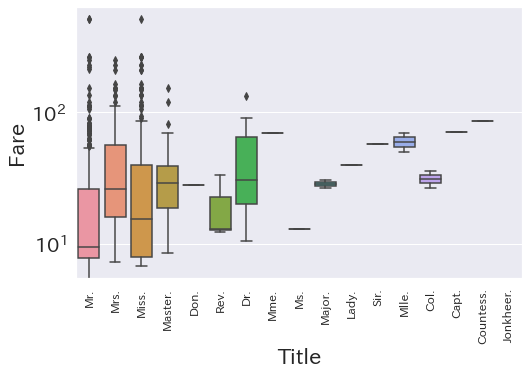

In [152]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(x='Title', y='Fare', data=df, ax=ax)
labels = ax.get_xticklabels()
ax.set_xticklabels(labels, rotation='vertical', fontsize=12)
ax.set_yscale("log")
plt.show()

## 散布図

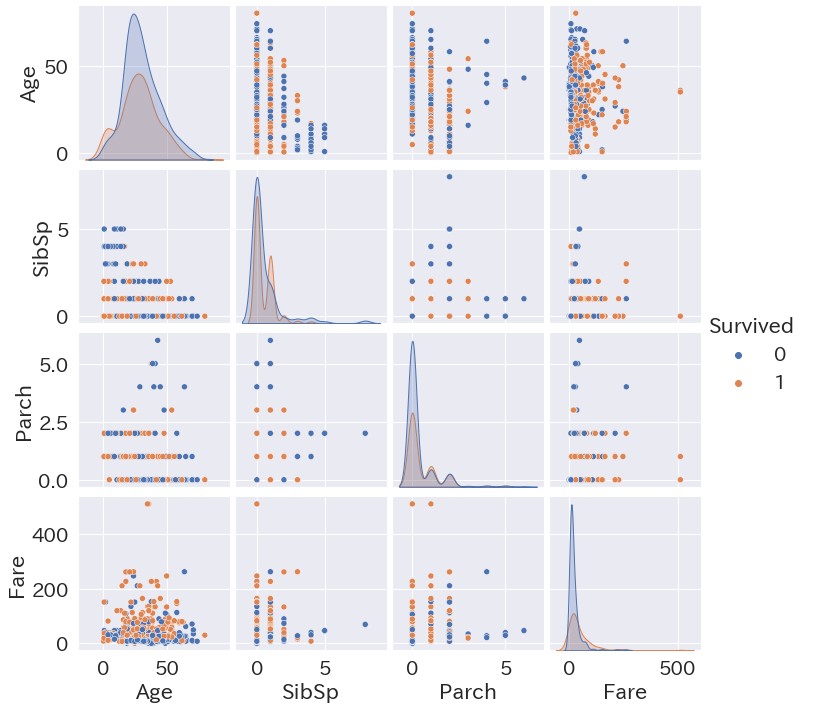

In [151]:
sns.pairplot(df, hue="Survived", height=2.5)

## 相関係数

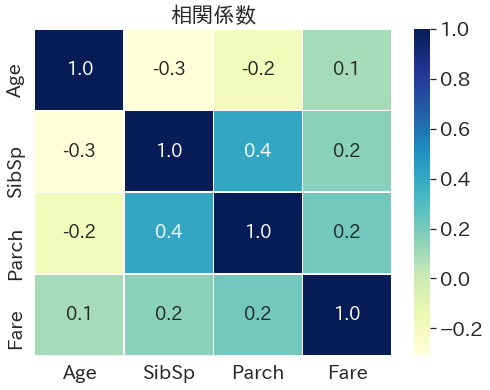

In [145]:
corr = df.corr()
plt.subplots(figsize=(8, 6))
sns.heatmap(corr, linewidth=.5, annot=True, annot_kws={"size": 18}, cmap='YlGnBu', fmt='.1f')
plt.title('相関係数')
plt.show()

## 並行座標プロット

In [148]:
df[['Survived', 'Pclass']] = df[['Survived', 'Pclass']].astype(int)
import plotly.express as px
fig = px.parallel_coordinates(df, color="Survived",
                              dimensions=['Age', 'SibSp', 'Parch', 'Pclass', 'Fare', 'Survived'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=0.5)
fig.show()